<a href="https://colab.research.google.com/github/devjmc/Music21_musescore_Colab/blob/master/music21_Colab_musescore_BWV_775_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Example of musical analysis with music21 in Colab.
With musescore integration. 

In [1]:
#mount googe drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
#This will reload the python libraries if modified, without a need to restart the runtime.
%load_ext autoreload
%autoreload 2

there are two methods.

In [0]:
#musescore requires Xserver but colab has none.
#Install a headless xserver in the Colab VM just to enable musescore to work
!apt-get -qq install -y xvfb x11-utils

In [0]:
#Method 1
import os
os.system('/usr/bin/Xvfb :99 -screen 0 1024x768x24 &')
os.environ['DISPLAY'] = ':99'

In [26]:
#Method 2. not sure it works.
#Launch xvbf in the background using ipython magic 
%%script bash --bg 
Xvfb :99 -screen 0 800x600x16&
export DISPLAY=:99
echo $DISPLAY


Starting job # 0 in a separate thread.


In [5]:
#Install musescore
!apt-get -qq install -y musescore

Extracting templates from packages: 100%
Selecting previously unselected package libdaemon0:amd64.
(Reading database ... 144500 files and directories currently installed.)
Preparing to unpack .../00-libdaemon0_0.14-6_amd64.deb ...
Unpacking libdaemon0:amd64 (0.14-6) ...
Selecting previously unselected package libqt5svg5:amd64.
Preparing to unpack .../01-libqt5svg5_5.9.5-0ubuntu1_amd64.deb ...
Unpacking libqt5svg5:amd64 (5.9.5-0ubuntu1) ...
Selecting previously unselected package libcap2-bin.
Preparing to unpack .../02-libcap2-bin_1%3a2.25-1.2_amd64.deb ...
Unpacking libcap2-bin (1:2.25-1.2) ...
Selecting previously unselected package libgstreamer1.0-0:amd64.
Preparing to unpack .../03-libgstreamer1.0-0_1.14.5-0ubuntu1~18.04.1_amd64.deb ...
Unpacking libgstreamer1.0-0:amd64 (1.14.5-0ubuntu1~18.04.1) ...
Selecting previously unselected package liborc-0.4-0:amd64.
Preparing to unpack .../04-liborc-0.4-0_1%3a0.4.28-1_amd64.deb ...
Unpacking liborc-0.4-0:amd64 (1:0.4.28-1) ...
Selecting pre

In [0]:
#Launching xvfb in background as is "!Xvfb :0 -screen 0 800x600x16&" does not return"

In [0]:
import sys
sys.path.append('/content/drive/My Drive/Colab Notebooks/music')

In [7]:
%cd '/content/drive/My Drive/Colab Notebooks/music'
!ls

/content/drive/My Drive/Colab Notebooks/music
'BWV999 OnlyChords-Copy1.ipynb'
'BWV999 OnlyChords.ipynb'
 Invention_BWV_772_in_C_Major.mxl
 Invention_No_4_in_D_minor_BWV_775.mxl
 music21_Colab_musescore_BWV_775_analysis.ipynb
 Prelude_in_C_minor_-_BWV_999_-_Bach.mxl
 testingmusic21.ipynb


In [8]:
#Optional. Test that mscore works fine with xfvb. 
!mscore -o 775.png Prelude_in_C_minor_-_BWV_999_-_Bach.mxl

QStandardPaths: XDG_RUNTIME_DIR not set, defaulting to '/tmp/runtime-root'
initScoreFonts 0x55aa3b24b980
convert <Prelude_in_C_minor_-_BWV_999_-_Bach.mxl> to <775.png>
Info at line 58 col 13: break on first measure


In [0]:
#music21 is already provided by colab. No need to install with !pip
from music21 import *

Instead of loading the .mxl files in Drive and then mount the drive, we could download them directly from http://learnmusictheory.net/lmtnet/anthology/ or any other repository with curl or wget in the same way as we run other shell commands.

In [0]:
s = converter.parse('/content/drive/My Drive/Colab Notebooks/music/Invention_No_4_in_D_minor_BWV_775.mxl')

In [12]:
s.analyze('key')

<music21.key.Key of d minor>

In [0]:
#Set music21 environment so it can find musescore
us=environment.UserSettings()
us['musescoreDirectPNGPath']='/usr/bin/mscore'

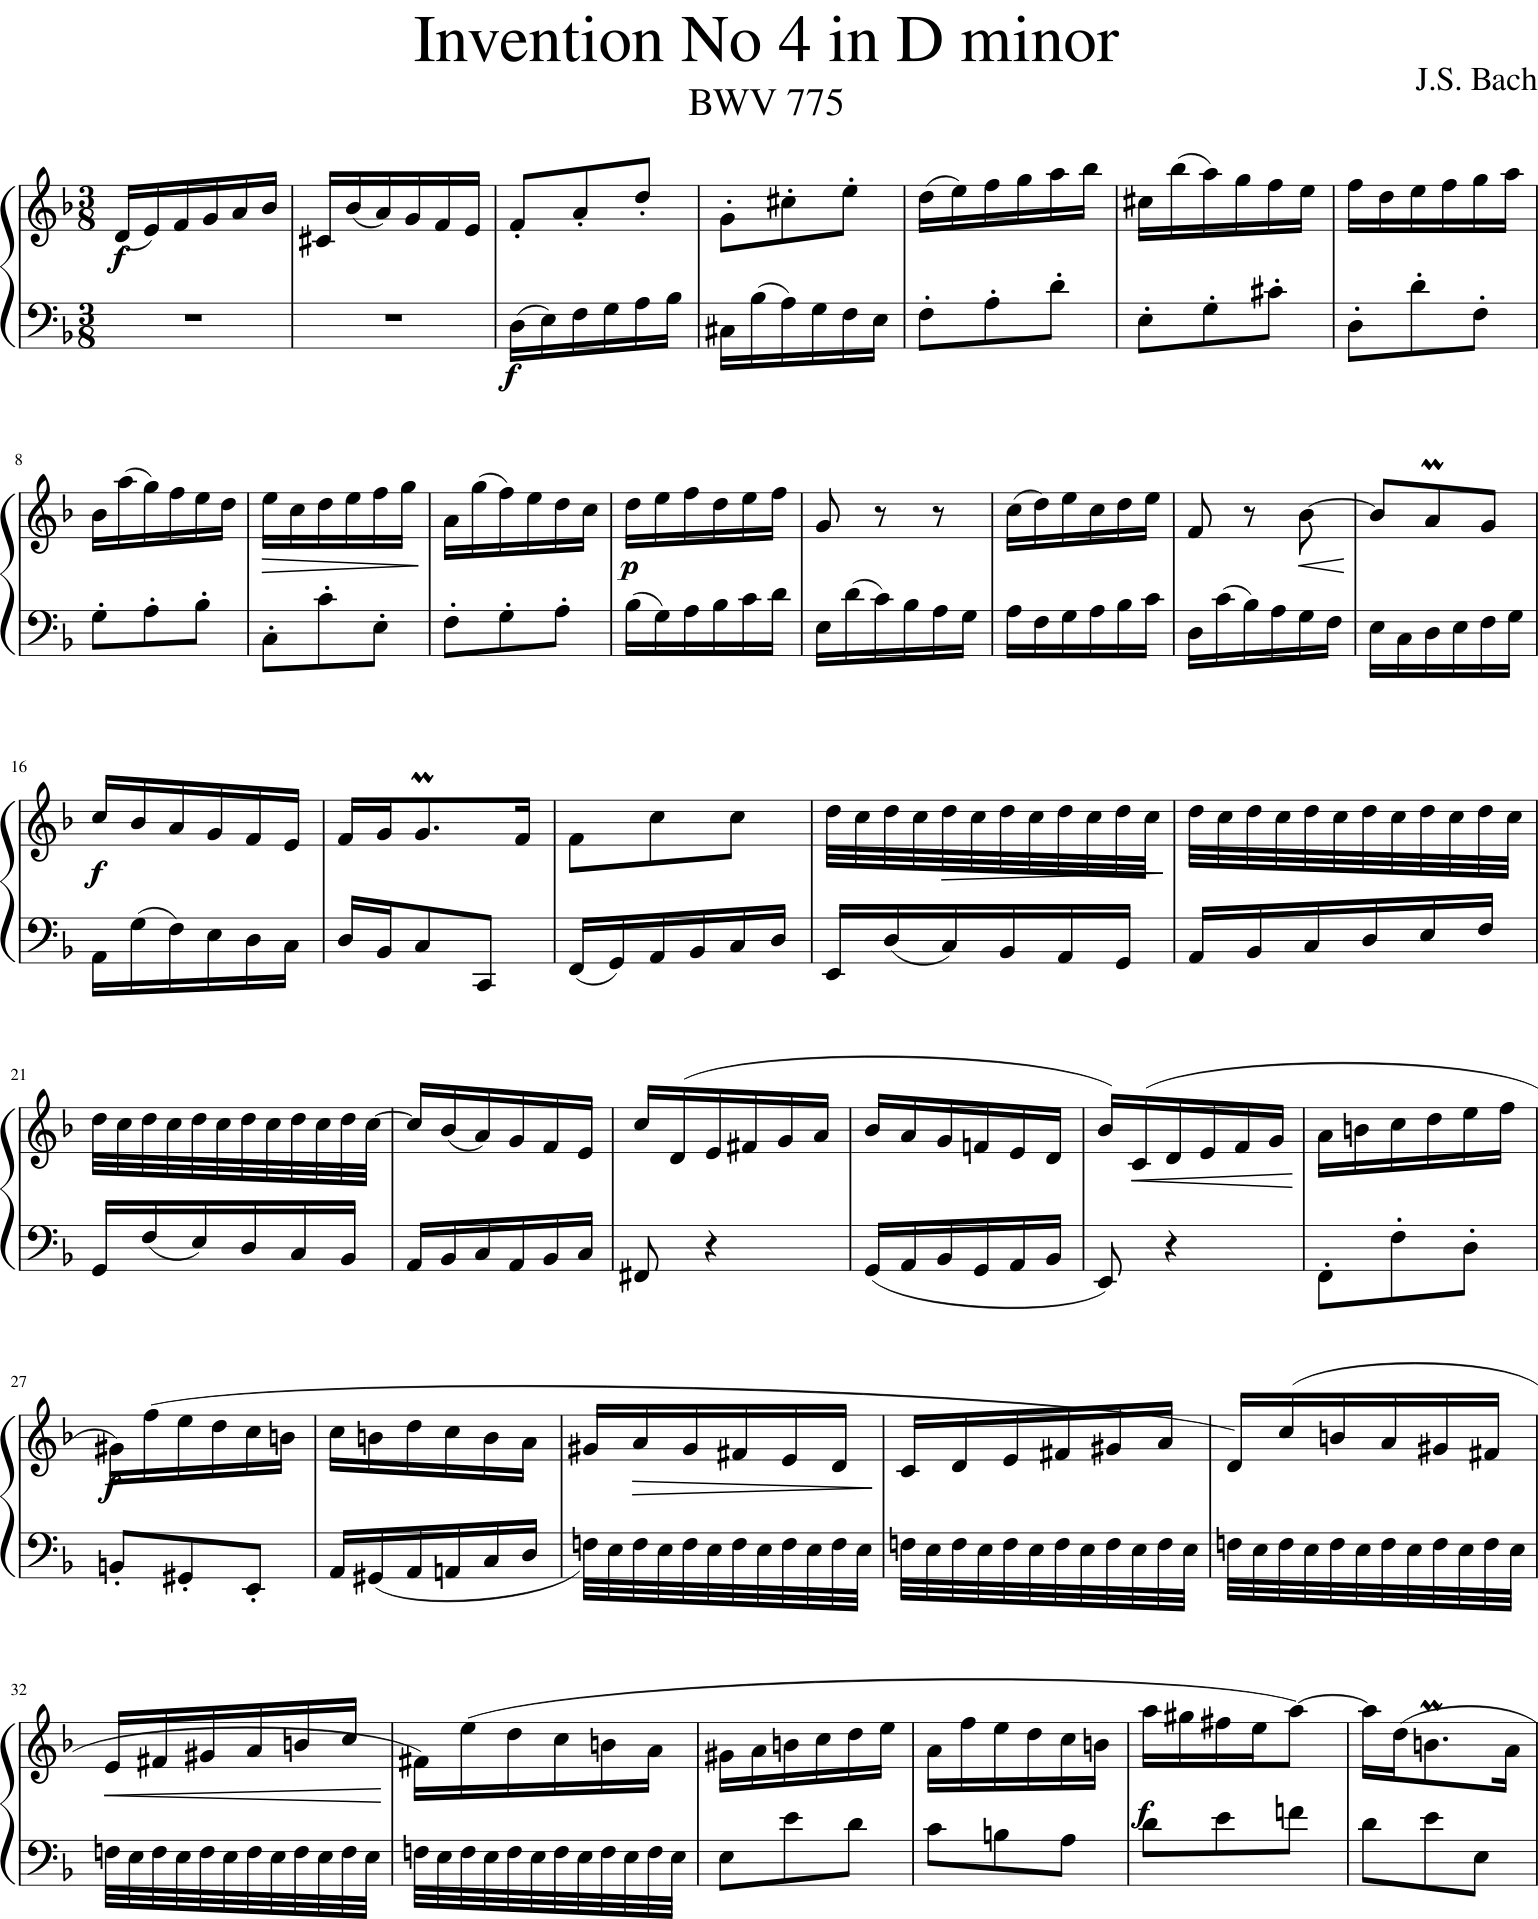

In [16]:
#This command calls musescore to produce the score
s.show()

In [0]:
choraleChords=s.chordify()

In [0]:
for c in choraleChords.recurse().getElementsByClass('Chord'):
    # force closed position
    c.closedPosition(forceOctave=4, inPlace=True)
    c.addLyric(c.commonName)
    c.addLyric(c.intervalVectorString)
    #c.addLyric(c.)
    
    # apply roman numerals
    rn = roman.romanNumeralFromChord(c, key.Key('d'))
    c.addLyric(str(rn.figure))
    
    # highlight dimished seventh chords
    if c.isConsonant():
        c.style.color = 'red'
    
    # highlight dominant seventh chords
    if c.isSeventh():
        c.style.color = 'blue'
        
s.insert(0,choraleChords)   



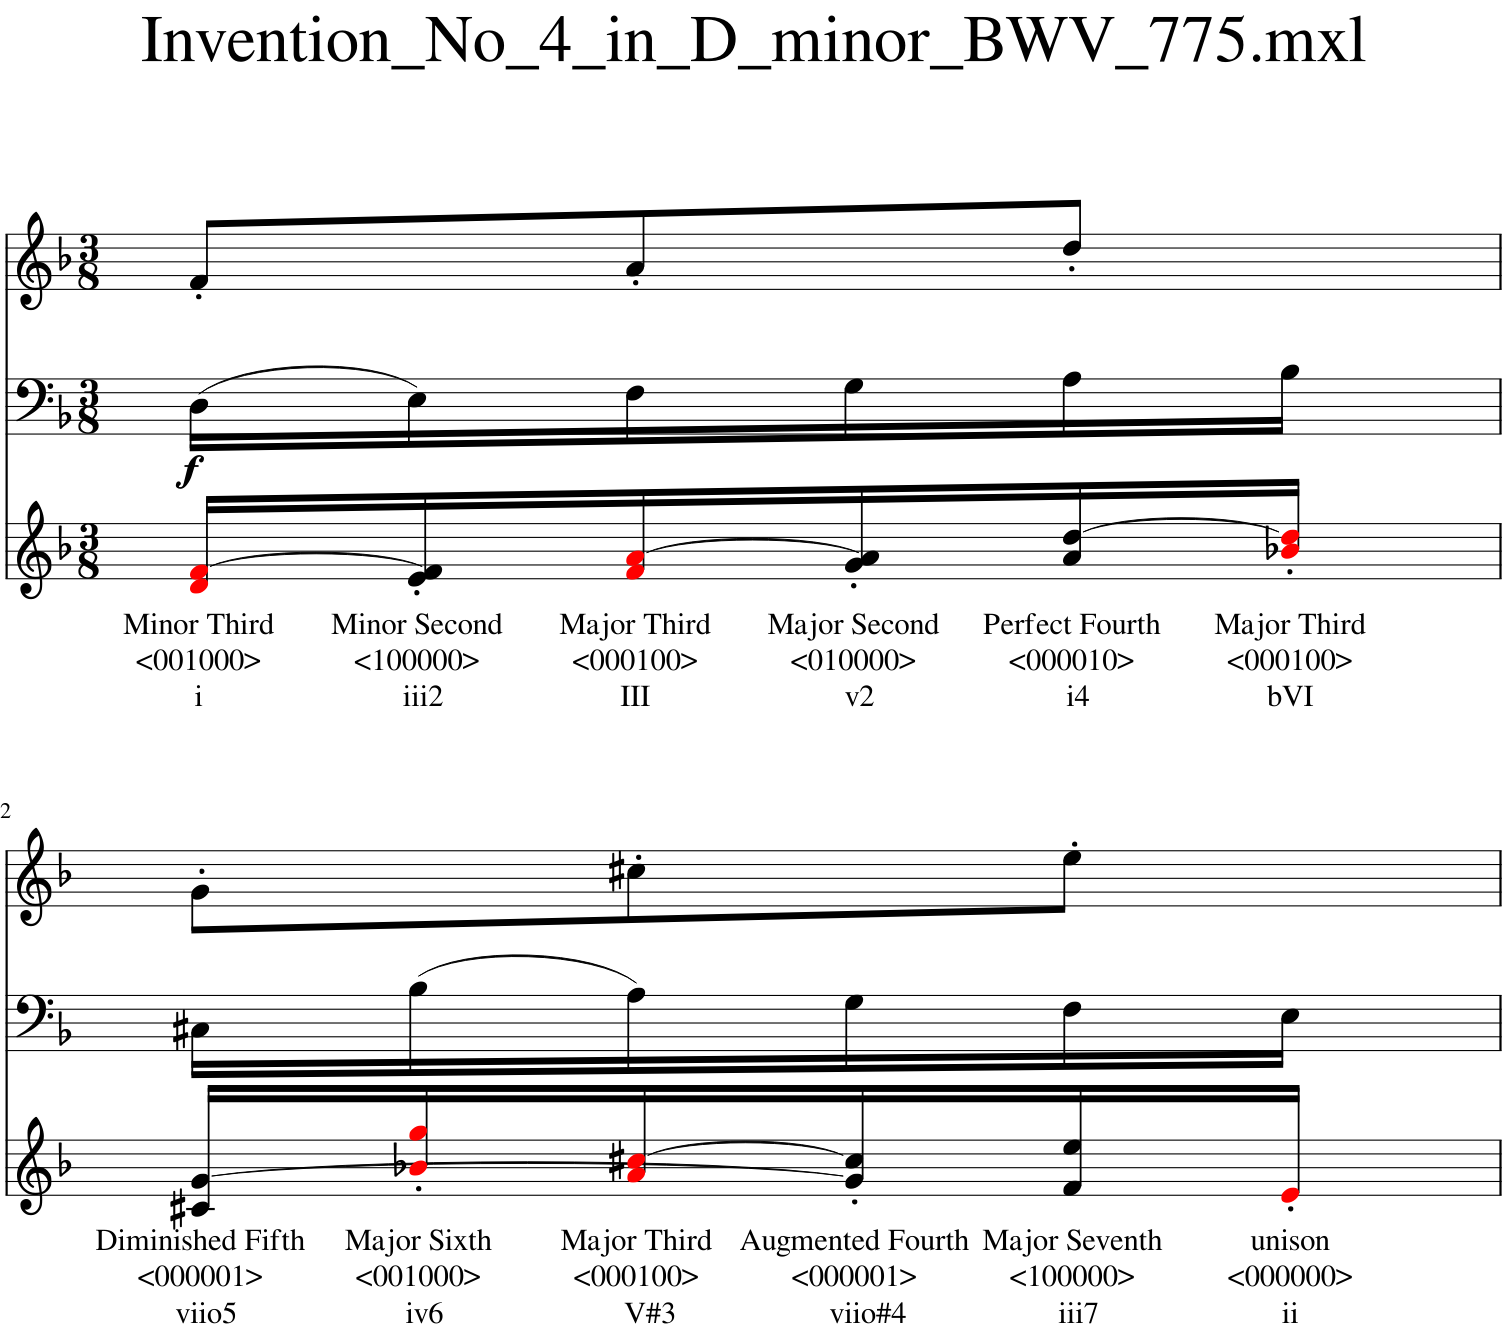

In [23]:
s.measures(3,4).show()

In [28]:
inMeasures = list(s.parts[0].getElementsByClass('Measure'))
print(len(inMeasures))

52
